In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-10000-movies-dataset/movies-tmdb-10000.csv


In [2]:
movies_data = pd.read_csv("/kaggle/input/tmdb-10000-movies-dataset/movies-tmdb-10000.csv", index_col=1)
movies_data.head()

,Unnamed: 0,overview,release_date,vote_average,vote_count,original_language,popularity
title,,,,,,,
The Godfather,0,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429
The Shawshank Redemption,1,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717
Cuando Sea Joven,2,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971
"The Boy, the Mole, the Fox and the Horse",3,"The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793
The Godfather Part II,4,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662


In [3]:
# - Let's select the columns we're interested in and save as new dataframe

movies_df = movies_data[["release_date","vote_average","vote_count","original_language", "popularity"]]

# - let's sort the movies by date to see the date range of our data
movies_df["release_date_conv"] = pd.to_datetime(movies_df["release_date"])

# - Let's create a new column called release_year and save the years the movies where released
# - We're trying to see the distribution of movies

movies_df_sorted = movies_df.sort_values("release_date_conv")
movies_df_sorted["release_year"] = movies_df_sorted["release_date_conv"].dt.year

# - Our dataframe contains movies released between 1895 and 2023

# - Let's check for empty columns
movies_df_sorted.isna().any() # - no empty columns in our dataset

# - Check for duplicates
movies_df_sorted.duplicated() # - no duplicate rows found

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


title
The Sprinkler Sprinkled              False
A Trip to the Moon                   False
The Great Train Robbery              False
The Right of Youth                   False
The Birth of a Nation                False
                                     ...  
You People                           False
JUNG_E                               False
Knock at the Cabin                   False
Your Place or Mine                   False
Ant-Man and the Wasp: Quantumania    False
Length: 10000, dtype: bool

Now that we're sure that our data is okay, let's do some basic analysis to get an initial or basic idea about our data. It'll be nice to see the the total number of top-rated movies released for each language

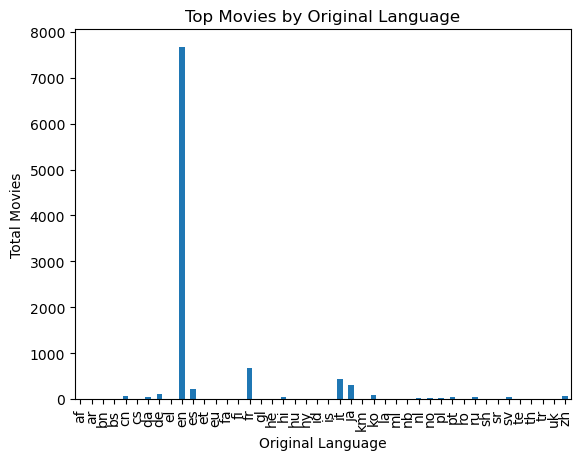

In [4]:
import numpy as np
from matplotlib import pyplot as plt
# - Create a pivot table that shows the total number of movies released for each langua
movies_by_language = movies_df_sorted.groupby("original_language")["release_date"].count()

# - We can display this information in a bar chart
movies_by_language.plot(kind="bar", xlabel="Original Language", ylabel="Total Movies", title="Top Movies by Original Language")

plt.show()

From the above chart, we can see that top-rated english movies are much more than others. The second is france and then italian movies. Because of the disparity between the english movies and others, we'll explore ways to compare the movies between languages to see  more insights into this data. First, Let's take a look at the the distribution of english movies across the time frames using a histogram.

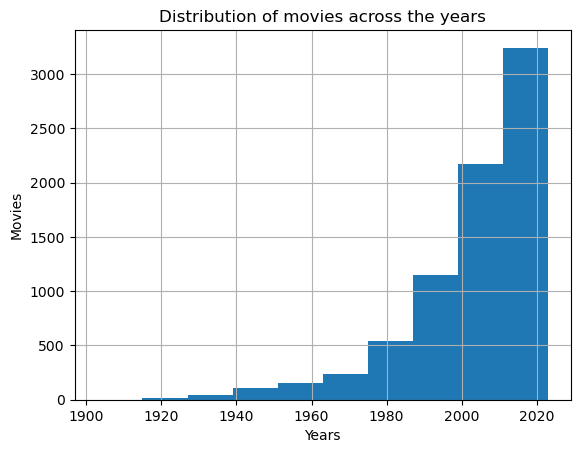

In [5]:
english_movies = movies_df_sorted[movies_df_sorted["original_language"] == "en"]

#let's plot a histogram showing the distribution of movies over the years
english_movies["release_year"].hist(bins=10)

plt.xlabel("Years")
plt.ylabel("Movies")
plt.title("Distribution of movies across the years")
plt.show()

From the histogram above, we can see that across the decades, top rated english movies have grown at a significant rate. Let's compare this distribution with that of france next and try too make actual meaning of the growth rate. We will show this using a histogram as well 

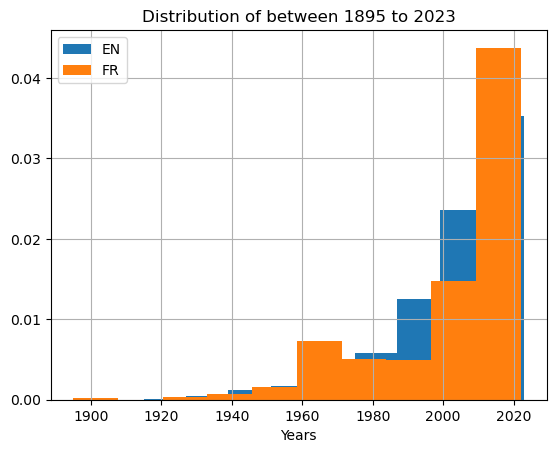

In [6]:
french_movies = movies_df_sorted[movies_df_sorted["original_language"] == "fr"]

#let's plot a histogram showing the distribution of movies over the years
english_movies["release_year"].hist(bins=10, density=True)
french_movies["release_year"].hist(bins=10, density=True)

plt.xlabel("Years")
plt.legend(["EN","FR"])
plt.title("Distribution of between 1895 to 2023")
plt.show()

**From the histogram above, comparing the two languages we notice notice a few observations**
- Though the number of engish movies released has been much more than the other languages, we can see that, french movies have actually made more significant growth in movie production than the english.
- While English movies have been on a steady growth throughout the years, french movies experienced an increased production between 1959 and 1970, then a reduction for a long period between 1970 to 1997 (approx). Then a spike from that period till date; experiencing more growth in % movie produced than it's english conterparts.

With the following observations, we can go ahead to compare with other countries, but with the observations recorded above, there's something interisting we noticed. The spike in the movies produced in france from 1997 till date.
Let's do some analysis on the french movie data to see any interesting reason for this growth or any correlation in our data.

In [7]:
# - Let's inspect our french movies dataset again
french_movies.head()

,release_date,vote_average,vote_count,original_language,popularity,release_date_conv,release_year
title,,,,,,,
The Sprinkler Sprinkled,1895-06-10,6.9,212,fr,5.523,1895-06-10,1895
A Trip to the Moon,1902-04-17,8.0,1479,fr,13.999,1902-04-17,1902
The Passion of Joan of Arc,1928-04-21,8.1,757,fr,8.831,1928-04-21,1928
Un Chien Andalou,1929-06-05,7.5,1090,fr,11.697,1929-06-05,1929
L'Âge d'Or,1930-11-28,6.8,245,fr,6.928,1930-11-28,1930


<Figure size 1200x800 with 0 Axes>

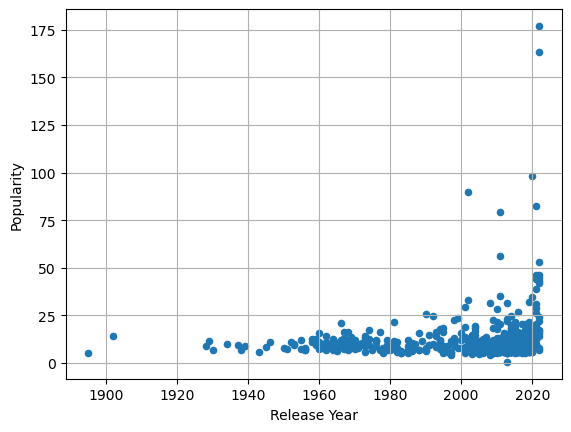

In [8]:
# - Let's try to see if there's a correlation between movie_popularity and the release years.
# - To do this, we can use a scatter plot
plt.figure(figsize=(12,8))

french_movies.plot(kind="scatter", x="release_year", y="popularity")

plt.xlabel("Release Year")
plt.ylabel("Popularity")

plt.grid()
plt.show()